# Read Dataset

# 1.Check eligibility of the Customer given the inputs described above.(Classification)

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import os
os.chdir("/Users/I A T Laptop L.L.C/Desktop/Project-II")

In [3]:
import pandas as pd
A = pd.read_csv("training_set (1).csv")

In [4]:
A.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


# Missing data treatment

In [5]:
from PM8wd import replacer
replacer(A)

# Define X & Y

In [6]:
Y = A[["Loan_Status"]]
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)

In [7]:
Y.head(2)

,Loan_Status
0,Y
1,N


In [8]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural


# Divide data in con & cat features

In [9]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [10]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [11]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Exploratory Data Analysis

In [12]:
from PM8wd import ANOVA,chisq

for i in con:
    print("--------","Loan_Status vs",i,"-------")
    print(ANOVA(A,"Loan_Status",i))

-------- Loan_Status vs ApplicantIncome -------
0.90252
-------- Loan_Status vs CoapplicantIncome -------
0.14239
-------- Loan_Status vs LoanAmount -------
0.36769
-------- Loan_Status vs Loan_Amount_Term -------
0.60396
-------- Loan_Status vs Credit_History -------
0.0


In [13]:
for i in cat:
    print("--------","Loan_Status vs",i,"-------")
    print(chisq(A,"Loan_Status",i))

-------- Loan_Status vs Gender -------
0.73915
-------- Loan_Status vs Married -------
0.02961
-------- Loan_Status vs Dependents -------
0.36887
-------- Loan_Status vs Education -------
0.0431
-------- Loan_Status vs Self_Employed -------
0.97107
-------- Loan_Status vs Property_Area -------
0.00214


# Standardisation

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [15]:
ss.fit(X[con])

StandardScaler()

In [16]:
X1 = pd.DataFrame(ss.transform(X[con]),columns=con)

In [17]:
X1.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072651,-0.554368,0.000000,0.279851,0.45164
1,0.000000,-0.038610,-0.219273,0.279851,0.45164


# Outlier Removal from training data

In [18]:
from PM8wd import outliers
Out = outliers(X1)

In [19]:
#Out

In [20]:
X1 = X1.drop(index=Out,axis=0)
Y = Y.drop(index=Out,axis=0)

In [21]:
X2 = pd.get_dummies(X[cat])
X2.head(2)

Xnew = X1.join(X2)

Xnew.shape
Y.shape

(577, 1)

# Create model

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [23]:
tr_acc

0.8134490238611713

In [24]:
ts_acc

0.8362068965517241

# Tree Model on the basis of imp features

In [25]:
X = X[["Credit_History","CoapplicantIncome","Property_Area","Education","Married"]]

In [26]:
from PM8wd import preprocessing
Xnew = preprocessing(X)

In [27]:
Xnew.shape

(614, 9)

In [28]:
Xn = Xnew.drop(index=Out,axis=0)

In [29]:
Xn.shape

(577, 9)

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xn,Y,test_size=0.2,random_state=21)

In [31]:
from sklearn.ensemble import RandomForestClassifier
dtc = RandomForestClassifier(criterion="entropy",random_state=21,max_depth=3)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [32]:
tr_acc

0.8134490238611713

In [33]:
ts_acc

0.8448275862068966

# Gridsearch CV
 To regularise the errors

In [34]:
tuning_grid = {"max_depth":range(2,5,1),"criterion":["gini","entropy"],"n_estimators":range(20,30,1)}

In [35]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
cv = GridSearchCV(rfc,tuning_grid,scoring="accuracy",cv=4)

cvmodel = cv.fit(xtrain,ytrain)

In [36]:
cvmodel.best_params_

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 20}

In [37]:
rfc_model =RandomForestClassifier(criterion='gini', max_depth=2, n_estimators= 20,random_state=21)

In [38]:
model = rfc_model.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [39]:
tr_acc

0.8112798264642083

In [40]:
ts_acc

0.8448275862068966

# Getting Data ready for predictions¶

In [41]:
B = pd.read_csv("testing_set.csv")

In [42]:
#B1 =B[X.columns].head()

# Missing data treatment on testing dataset

In [43]:
replacer(B)

cat = []
con = []
for i in B.columns:
    if(B[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

# Preprocessing

In [44]:
B1 = pd.DataFrame(ss.transform(B[con]),columns=con)
B2 = pd.get_dummies(B[cat])
Bnew = B1.join(B2)

In [45]:
Xn.columns # Imp Features

Index(['Credit_History', 'CoapplicantIncome', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Education_Graduate',
       'Education_Not Graduate', 'Married_No', 'Married_Yes'],
      dtype='object')

In [46]:
cols_ready_for_pred = Bnew[Xn.columns] # Extracted imp features from Xn to Bnew,to make predictions

In [47]:
final_predictions=model.predict(cols_ready_for_pred)
final_predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [48]:
F = pd.DataFrame([B.Loan_ID,final_predictions]).T
F.columns = ["Loan_ID","Loan_Status"]

In [49]:
F.to_csv("submission.csv")

In [50]:
F.head(3)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y


# Problem Statement 3(A)

# If customer is not eligible for the input required amount and duration:
a.)what can be amount for the given duration.(Regression)

In [51]:
B['Loan_Status']=final_predictions # added final predictions to testing dataset with new colum name as Loan_Status

In [52]:
B.columns #new predicted loan status get added to testing dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Find out people for whom loan was rejected(testing set)

In [53]:
xtest = B[B.Loan_Status == "N"]#People whose loan rejected(from testing dataset with added loan status column)
xtest_1 = xtest.drop(labels=['Loan_ID','LoanAmount','Loan_Status'],axis=1)

In [54]:
xtest_1.index = range(0,xtest_1.shape[0])

In [55]:
xtest_1.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,2,Not Graduate,No,3881,0,360.0,0.0,Rural
1,Male,Yes,2,Graduate,No,12173,0,360.0,0.0,Semiurban
2,Male,No,0,Graduate,No,0,24000,360.0,0.0,Rural


# Create training data based on above predictors(same columns)

In [56]:
Q = A[xtest_1.columns] # imported same columns as xtest_1 from original training dataset i.e. A
Q['LS'] = A.Loan_Status # added Loan_status to Q from original training data A

In [57]:
Q.head(2)#  Q is Training dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LS
0,Male,No,0,Graduate,No,5849.00000,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,360.0,1.0,Rural,N


In [58]:
Q = Q[Q.LS == "Y"] # exported approved loan people
Q = Q.drop(labels=["LS"],axis=1)

In [59]:
Q.head(3) # here are 422 people with approved loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,360.0,1.0,Urban
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,360.0,1.0,Urban


In [60]:
R = A[["LoanAmount"]]
R = R.iloc[Q.index,:]
R.index = range(0,R.shape[0])
Q.index = range(0,R.shape[0])

In [61]:
R.shape  #(Y) ytrain

(422, 1)

In [62]:
Q.shape #(X) xtrain

(422, 10)

# Preprocessing

In [63]:
replacer(Q) # training set
replacer(xtest_1) # testing set

In [64]:
from PM8wd import preprocessing
xtrain = preprocessing(Q)
xtest_final = preprocessing(xtest_1)

In [65]:
#xtrain - Data from testing dataset
ytrain = R.LoanAmount # Loan Amount from training data(Actual amount approved)

In [66]:
ytrain = R.LoanAmount

In [67]:
ytrain.head(3)

0    146.412162
1     66.000000
2    120.000000
Name: LoanAmount, dtype: float64

# Linear Regression model

In [68]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest_final)

In [69]:
pred #predicted loan amount for people whose applied loan amount was rejected

array([140.76282884, 340.98887023, 167.44009611, 108.34716488,
        97.92989025, 139.21375108,  95.72410567, 140.91979522,
       126.69845822, 137.37645312, 162.3882514 , 162.96968459,
       125.70134756, 182.87814716, 112.50349217,  80.3519515 ,
       118.676172  ,  85.87091315, 100.7479767 , 133.6684905 ,
       320.96099213, 184.88676045, 151.84864623, 213.26225442,
       240.32081636, 117.2343788 , 104.03410412,  73.01468012,
        68.16287152, 121.82167629,  94.52236613, 104.73290799,
       153.72808893, 133.0056771 , 175.04357448, 120.12395518,
       178.42122479, 175.51193393, 173.08154086, 100.36649536,
       112.16208568, 144.86167816, 121.51234457, 112.65882731,
       161.59599456, 108.50934213, 157.27788765, 204.81961608,
       192.41989475, 113.4063788 , 143.12129572, 105.01449359,
       208.77720141, 143.72001335,  85.34117815,  66.50746875,
       151.82643905, 142.63575017, 153.91191277])

In [70]:
pred.shape

(59,)

In [71]:
Actual_Amt = B[B.Loan_Status == "N"][["LoanAmount"]]# actual loan amount applied but got rejected

In [72]:
Actual_Amt.index = range(0,59)

In [73]:
Actual_Amt.head(2)

,LoanAmount
0,147.0
1,166.0


In [74]:
E = range(0,59)

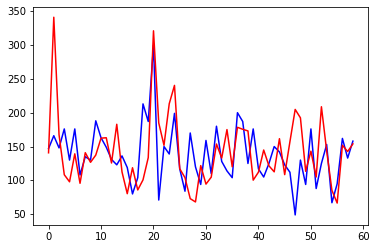

In [75]:
import matplotlib.pyplot as plt
plt.plot(Actual_Amt,c="blue")
plt.plot(pred,c="red")

In [76]:
pred

array([140.76282884, 340.98887023, 167.44009611, 108.34716488,
        97.92989025, 139.21375108,  95.72410567, 140.91979522,
       126.69845822, 137.37645312, 162.3882514 , 162.96968459,
       125.70134756, 182.87814716, 112.50349217,  80.3519515 ,
       118.676172  ,  85.87091315, 100.7479767 , 133.6684905 ,
       320.96099213, 184.88676045, 151.84864623, 213.26225442,
       240.32081636, 117.2343788 , 104.03410412,  73.01468012,
        68.16287152, 121.82167629,  94.52236613, 104.73290799,
       153.72808893, 133.0056771 , 175.04357448, 120.12395518,
       178.42122479, 175.51193393, 173.08154086, 100.36649536,
       112.16208568, 144.86167816, 121.51234457, 112.65882731,
       161.59599456, 108.50934213, 157.27788765, 204.81961608,
       192.41989475, 113.4063788 , 143.12129572, 105.01449359,
       208.77720141, 143.72001335,  85.34117815,  66.50746875,
       151.82643905, 142.63575017, 153.91191277])

In [77]:
Actual_Amt['predictions']=pred

In [78]:
Actual_Vs_Predicted = Actual_Amt
Actual_Vs_Predicted

,LoanAmount,predictions
0,147.000000,140.762829
1,166.000000,340.988870
2,148.000000,167.440096
3,176.000000,108.347165
4,130.000000,97.929890
5,176.000000,139.213751
6,108.000000,95.724106
7,135.000000,140.919795
8,130.000000,126.698458
9,188.000000,137.376453


In [79]:
Actual_Vs_Predicted.to_csv("New_Amt_predictions.csv")

# Problem statement 3(B)

# Prepare data for prediction(from testing set)

In [80]:
B['Duration']=B.Loan_Amount_Term/12 # Loan_amount_term in Years

In [81]:
Data_for_pred=B[(B.Duration <= 20) & (B.Loan_Status=="Y")] # people whose loan amt approved for less tha equal to 20 years

In [82]:
Data_for_pred_final = Data_for_pred.drop(labels=['Duration','Loan_ID','Loan_Status',"Loan_Amount_Term"],axis=1)
#Drop unnecessary columns

In [83]:
Data_for_pred_final.index = range(0,Data_for_pred_final.shape[0]) #Reinitialize the index

In [84]:
Data_for_pred_final.head(2) # we get people loan approved less than = 20 years

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,Yes,2,Graduate,No,13633,0,280.0,1.000000,Urban
1,Male,No,3+,Graduate,No,4166,0,40.0,0.825444,Urban


# Prepare training data

In [85]:
T = A[A.Loan_Status == "Y"] # people with approved loan amount
T1 = T[Data_for_pred_final.columns] # rename column names from Data_for_pred_final
T1.index = range(0,T1.shape[0])

In [86]:
T1 # training data with approved loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,1.0,Urban
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,1.0,Urban
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,1.0,Urban
3,Male,No,0,Graduate,No,6000.0,0.0,141.000000,1.0,Urban
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.000000,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
417,Male,Yes,0,Graduate,No,3232.0,1950.0,108.000000,1.0,Rural
418,Female,No,0,Graduate,No,2900.0,0.0,71.000000,1.0,Rural
419,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,1.0,Rural
420,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,1.0,Urban


In [87]:
xtrain = preprocessing(T1)

In [88]:
xtrain.shape

(422, 19)

In [89]:
ytrain = T[["Loan_Amount_Term"]]

In [90]:
ytrain.shape

(422, 1)

In [91]:
ytrain.index = range(0,ytrain.shape[0])

In [92]:
replacer(Data_for_pred_final) # missing data treatment 
finaldata_for_pred = preprocessing(Data_for_pred_final) # preprocessing
finaldata_for_pred # people with approved loan for less = 20

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,3.286495,-0.798641,2.950151,0.272166,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
1,-0.082500,-0.798641,-1.108566,-3.674235,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1
2,-1.102415,0.995712,-0.093887,0.272166,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
3,-0.823771,-0.798641,-1.311502,0.272166,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1
4,-0.518081,0.433102,0.328896,0.272166,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
5,1.050581,1.284773,1.343575,0.272166,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
6,-0.100293,-0.281537,-1.277679,0.272166,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
7,-0.279294,1.031392,0.481098,0.272166,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
8,0.114651,-0.798641,-0.263000,0.272166,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
9,-0.112037,0.119219,0.565655,0.272166,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1


In [93]:
model = lm.fit(xtrain,ytrain)
pred = model.predict(finaldata_for_pred)
pred

array([[320.42245821],
       [303.8502644 ],
       [371.39975742],
       [331.20934354],
       [352.41188862],
       [327.8130921 ],
       [312.09133831],
       [352.23195068],
       [335.86595001],
       [332.1535083 ],
       [335.26520921],
       [331.47999195],
       [341.5054192 ],
       [339.8408881 ],
       [341.41058912],
       [342.08979093],
       [331.18025633],
       [352.94853305],
       [350.07088508],
       [343.21045819],
       [350.35805259],
       [362.12508122],
       [352.29365086],
       [351.30323148],
       [322.93451216],
       [341.17745378],
       [355.20319721],
       [330.25795921],
       [330.97707037]])

In [94]:
pred/12

array([[26.70187152],
       [25.32085537],
       [30.94997979],
       [27.60077863],
       [29.36765738],
       [27.31775767],
       [26.00761153],
       [29.35266256],
       [27.98882917],
       [27.67945903],
       [27.93876743],
       [27.62333266],
       [28.45878493],
       [28.32007401],
       [28.45088243],
       [28.50748258],
       [27.59835469],
       [29.41237775],
       [29.17257376],
       [28.60087152],
       [29.19650438],
       [30.1770901 ],
       [29.35780424],
       [29.27526929],
       [26.91120935],
       [28.43145448],
       [29.60026643],
       [27.5214966 ],
       [27.58142253]])

In [95]:
U = B[(B.Duration<=20)&(B.Loan_Status=="Y")][["Loan_Amount_Term"]]
U.index = range(0,U.shape[0])

In [96]:
U.shape

(29, 1)

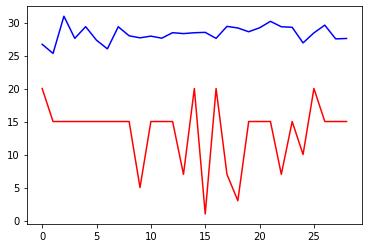

In [97]:
plt.plot(U/12,c="red") # Actual Loan_Amount term in years
plt.plot(pred/12,c="blue") # predictions for Duration less than = 20 years

In [98]:
Duration = U/12

In [99]:
(pred/12)

array([[26.70187152],
       [25.32085537],
       [30.94997979],
       [27.60077863],
       [29.36765738],
       [27.31775767],
       [26.00761153],
       [29.35266256],
       [27.98882917],
       [27.67945903],
       [27.93876743],
       [27.62333266],
       [28.45878493],
       [28.32007401],
       [28.45088243],
       [28.50748258],
       [27.59835469],
       [29.41237775],
       [29.17257376],
       [28.60087152],
       [29.19650438],
       [30.1770901 ],
       [29.35780424],
       [29.27526929],
       [26.91120935],
       [28.43145448],
       [29.60026643],
       [27.5214966 ],
       [27.58142253]])

In [100]:
U['predicted_Amt_term']=pred

In [101]:
U['pred_Amt_years']=pred/12

In [102]:
U['Original_duration']=Duration

In [104]:
U.head(2)

,Loan_Amount_Term,predicted_Amt_term,pred_Amt_years,Original_duration
0,240.0,320.422458,26.701872,20.0
1,180.0,303.850264,25.320855,15.0


In [105]:
U.to_csv("New_Loan_Amount_term_for_yes_people.csv")